In [1]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Importation des valeurs

In [2]:
alpha = 0.15
b = 1
sigma = 0.2
T = 1
r = 0.05
K = 4
k = 20
dt = 1/20
S_0 = 5 #le fixer à 1 si on veut obtenir les cheveux 
nb_samples = 100

# Test du CIR 

In [3]:
import CIR

In [4]:
S = CIR.CIR(alpha, b, sigma, T, k, S_0)
#S1 = CIR.CIR_new(alpha, b, sigma, T/k, T, S_0)

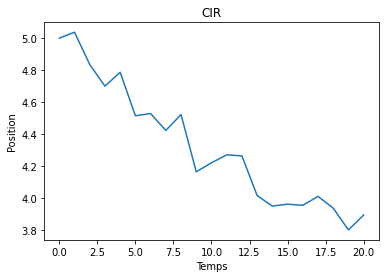

In [15]:
plt.plot(S)
#plt.plot(S1)
plt.xlabel('Temps')
plt.ylabel('Position')
plt.title('CIR')
plt.show()

In [16]:
M = CIR.multiCIR(alpha, b, sigma, T, k, S_0, nb_samples)

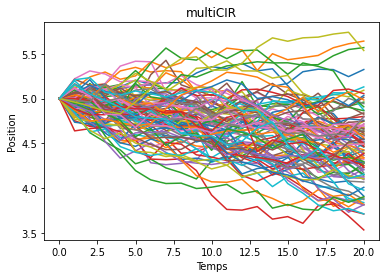

In [18]:
for i in range(nb_samples):
    plt.plot(M[i])
plt.xlabel('Temps')
plt.ylabel('Position')
plt.title('multiCIR')
plt.show()

# Monte Carlo Ordinaire

In [19]:
import ordinaryMC

In [20]:
ordinaryMC.pv_calc(M[3],r, T)

array([4.75614712, 4.76066204, 4.57727586, 4.6250208 , 4.74726063,
       4.67978426, 4.63744205, 4.52919572, 4.55118451, 4.56856519,
       4.48701806, 4.45976837, 4.46925448, 4.51565832, 4.55625183,
       4.4848832 , 4.49838112, 4.54908385, 4.53988112, 4.54769751,
       4.56701883])

In [21]:
OMC = ordinaryMC.ordinary_mc_sim(nb_samples, k, S_0, T, r, sigma, K, alpha, b)

In [22]:
np.mean(OMC)

0.6696686561406112

In [12]:
ordinaryMC.sim_iterator(1000, k, S_0, T, r, sigma, K, alpha, b)

(array([0.689957  , 0.70223065, 0.72745123, 0.70038898, 0.69511408,
        0.69458751, 0.66572837, 0.68181754, 0.63684434, 0.70144564,
        0.69010815, 0.65612916, 0.67251369, 0.68236177, 0.75014686,
        0.67848836, 0.68310281, 0.68567515, 0.66041997, 0.66415189,
        0.69032759, 0.64984944, 0.67082927, 0.68172118, 0.66422854,
        0.68195501, 0.658368  , 0.67059592, 0.69332468, 0.66417336,
        0.70162727, 0.68192855, 0.67142811, 0.67907   , 0.68698392,
        0.6890901 , 0.66224224, 0.67710555, 0.67087329, 0.67256377,
        0.68966848, 0.67467431, 0.67112027, 0.67875155, 0.6974816 ,
        0.68345382, 0.67810649, 0.68940477, 0.65830604, 0.67740914,
        0.67402752, 0.68950292, 0.66338068, 0.69184706, 0.66962962,
        0.67532988, 0.68142536, 0.67273772, 0.68454052, 0.68570331,
        0.68204618, 0.69530157, 0.6817934 , 0.67997854, 0.67155609,
        0.66280288, 0.67328394, 0.68745294, 0.67854653, 0.68240084,
        0.68662275, 0.66976679, 0.69450121, 0.68

# Comparaison Monte Carlo

In [13]:
max_sample = 1000

In [14]:
ordinaryMC_price_esitmates, ordinaryMC_CIs = ordinaryMC.sim_iterator(max_sample, k, S_0, T, r, sigma, K, alpha, b)



Price estimated at largest sample size with ordinary MC: 0.6732926281495042
CI length at largest sample size with ordinary MC: 0.027732495981601657


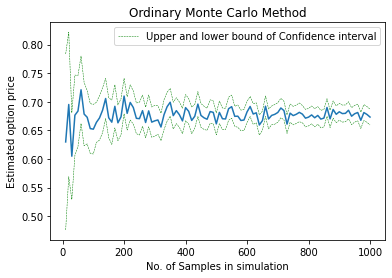

In [15]:
print("Price estimated at largest sample size with ordinary MC:", str(ordinaryMC_price_esitmates[-1]))
print("CI length at largest sample size with ordinary MC:", str(ordinaryMC_CIs[-1,1] - ordinaryMC_CIs[-1,0]))

#Ploting ordinary Monte Carlo method
x_axis1 = range(10, max_sample + 1, 10)
plt.plot(x_axis1, ordinaryMC_price_esitmates)
plt.plot(x_axis1, ordinaryMC_CIs[1:, 0], 'g--', lw=0.5, label='Upper and lower bound of Confidence interval')
plt.plot(x_axis1, ordinaryMC_CIs[1:, 1], 'g--', lw=0.5)
plt.xlabel("No. of Samples in simulation")
plt.ylabel("Estimated option price")
plt.title("Ordinary Monte Carlo Method")
plt.legend()
plt.show()


In [17]:
import comparaison

In [18]:
CI = ordinaryMC_CIs
tol = 0.005
mc_threshold = comparaison.threshold_finder(CI, tol)
#sample_convergent = mc_threshold * 10
sample_convergent = 1500



In [19]:
CPU_sample = comparaison.CPU(sample_convergent,k, S_0, T, r, sigma, K, alpha, b)
CPU_sample


0.13798279999900842

In [20]:
mean_pv_payoffs_cvg = 0.678999222272018
max_sample = 100

In [22]:

mse_values = comparaison.mse_comparaison(max_sample, k, S_0, T, r, sigma, K, alpha, b, mean_pv_payoffs_cvg)[0]

10
20
30
40
50
60
70
80
90
100


In [24]:
mse_values
# Je ne comprends pas pourquoi je trouve ce résultat, je ne suis pas censé obtenir ça

array([2.40998789e-04, 1.44109938e-04, 8.61828092e-05, 6.98804112e-05,
       4.78530355e-05, 4.55821394e-05, 4.25432547e-05, 3.13696483e-05,
       2.79471374e-05, 2.49978628e-05])

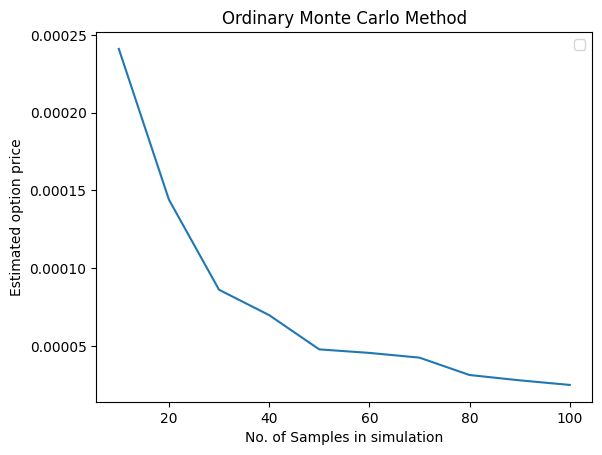

In [25]:
x_axis1 = range(10, max_sample + 1, 10)
plt.plot(x_axis1, mse_values)
plt.xlabel("No. of Samples in simulation")
plt.ylabel("Estimated option price")
plt.title("Ordinary Monte Carlo Method")
plt.legend()
plt.show()

# Quasi Monte Carlo

# tests Sobol generator

In [26]:
nb_samples = 100

In [27]:
sobol = CIR.sobol_generator(nb_samples, k)
print(sobol, len(sobol), len(sobol[1,]))

[[0.5     0.75    0.25    ... 0.84375 0.34375 0.46875]
 [0.5     0.25    0.75    ... 0.21875 0.71875 0.09375]
 [0.5     0.75    0.25    ... 0.09375 0.59375 0.46875]
 ...
 [0.75    0.25    0.875   ... 0.53125 0.15625 0.65625]
 [0.75    0.25    0.375   ... 0.09375 0.21875 0.71875]
 [0.75    0.25    0.125   ... 0.78125 0.65625 0.15625]] 117 20


# tests CIR_QMC

In [26]:
M = CIR.multiCIR_QMC(alpha, b, sigma, T, k, S_0, nb_samples)

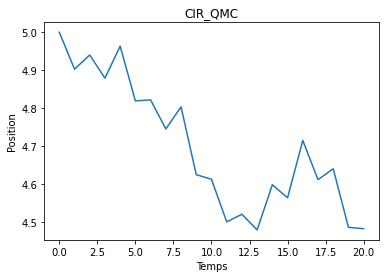

In [27]:
plt.plot(M[1])
plt.xlabel('Temps')
plt.ylabel('Position')
plt.title('CIR_QMC')
plt.show()

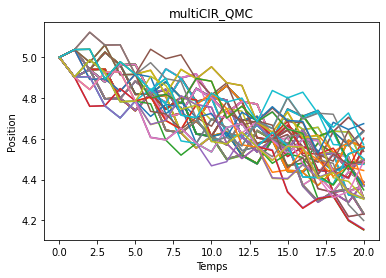

In [28]:
for i in range(nb_samples):
    plt.plot(M[i])
plt.xlabel('Temps')
plt.ylabel('Position')
plt.title('multiCIR_QMC')
plt.show()

# Quasi Monte Carlos

In [29]:
import ordinaryMC
import QMC

In [32]:
ordinaryMC.pv_calc(M[3],r, T)

array([4.75614712, 4.66345079, 4.69914028, 4.56226408, 4.56486702,
       4.50807057, 4.58792692, 4.60631592, 4.49585464, 4.61115062,
       4.56896722, 4.55650063, 4.38662669, 4.44190474, 4.37079301,
       4.3235163 , 4.41775917, 4.2991677 , 4.31043676, 4.23279869,
       4.27786066])

In [33]:
OMC_QMC = QMC.QMC_mc_sim(nb_samples, k, S_0, T, r, sigma, K, alpha, b)
np.mean(OMC_QMC)

0.6729958803021122

In [34]:
QMC.sim_iterator_QMC(1000, k, S_0, T, r, sigma, K, alpha, b)

(array([0.67030405, 0.66890891, 0.67289144, 0.67368627, 0.67307766,
        0.67222133, 0.67397267, 0.67343756, 0.67302825, 0.67299588,
        0.67232377, 0.67187278, 0.67152841, 0.67126818, 0.67215052,
        0.67281187, 0.67259377, 0.67073935, 0.67169282, 0.67153946,
        0.67227589, 0.67190686, 0.67178969, 0.67184999, 0.67205816,
        0.67217644, 0.67262645, 0.67164796, 0.67172295, 0.67181705,
        0.67182892, 0.67229061, 0.6728063 , 0.67348223, 0.67445719,
        0.67504915, 0.67634998, 0.67519357, 0.67572613, 0.6758411 ,
        0.67625629, 0.67650668, 0.67647068, 0.6763089 , 0.67627988,
        0.67621747, 0.67684416, 0.67628533, 0.67630456, 0.67596895,
        0.67577944, 0.67526663, 0.6755823 , 0.67539858, 0.67540742,
        0.67461142, 0.67503888, 0.67527696, 0.67473238, 0.67455601,
        0.67449193, 0.67466979, 0.67458252, 0.67376248, 0.67401107,
        0.67360358, 0.67293898, 0.67269142, 0.67246486, 0.67160056,
        0.67168216, 0.67152864, 0.67133645, 0.67

# Comparaison QMC

In [35]:
max_sample = 1000


sobol_price_esitmates, sobol_CIs = QMC.sim_iterator_QMC(max_sample, k, S_0, T, r, sigma, K, alpha, b)

In [36]:
print("Price estimated at largest sample size with Sobol sequence:", str(sobol_price_esitmates[-1]))
print("CI length at largest sample size with Sobol sequence:", str(sobol_CIs[-1,1] - sobol_CIs[-1,0]))


Price estimated at largest sample size with Sobol sequence: 0.672063980448986
CI length at largest sample size with Sobol sequence: 0.009965255969321296


ValueError: x and y must have same first dimension, but have shapes (10,) and (100,)

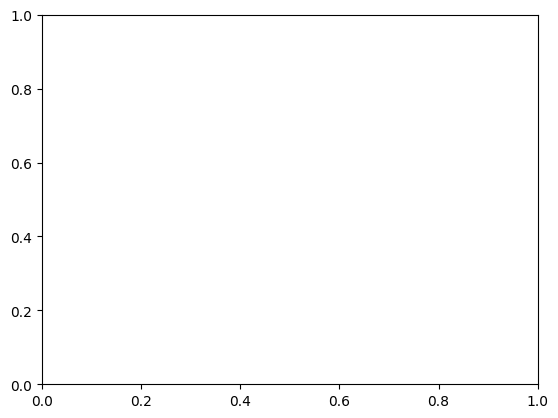

In [37]:
#Ploting quasi-Monte Carlo method using Sobol sequence

plt.plot(x_axis1, sobol_price_esitmates)
plt.plot(x_axis1, sobol_CIs[1:, 0], 'g--', lw=0.5, label='Upper and lower bound of Confidence interval')
plt.plot(x_axis1, sobol_CIs[1:, 1], 'g--', lw=0.5)
plt.xlabel("No. of Samples in simulation")
plt.ylabel("Estimated option price")
plt.title("QMC (Sobol Sequence) Method")
plt.legend()
plt.show()

In [38]:
tol = 0.01
sobol_threshold = comparaison.threshold_finder(sobol_CIs, tol)

99


In [39]:
sample_convergent_QMC = sobol_threshold * 10

In [40]:
CPU_sample_QMC = comparaison.CPU(sample_convergent_QMC,k, S_0, T, r, sigma, K, alpha, b)
CPU_sample_QMC

0.0986398500026553

In [41]:
mse_values_QMC = comparaison.mse_comparaison_QMC(max_sample, k, S_0, T, r, sigma, K, alpha, b, mean_pv_payoffs_cvg)[0]


AttributeError: module 'ordinaryMC' has no attribute 'QMC_mc_sim_random'

In [ ]:
x_axis1 = range(10, max_sample + 1, 10)
plt.plot(x_axis1, mse_values)
plt.plot(x_axis1, mse_values_QMC, 'g--', lw=0.5, label='Upper and lower bound of Confidence interval')
plt.xlabel("No. of Samples in simulation")
plt.ylabel("Estimated option price")
plt.title("Ordinary Monte Carlo Method")
plt.legend()
plt.show()

# tests Multi Level CIR

In [16]:
import CIR

In [17]:
L = 5

In [18]:
S = CIR.level_CIR(alpha, b, sigma, L, T, S_0)

In [19]:
S

(array([0.     , 0.03125, 0.0625 , 0.09375, 0.125  , 0.15625, 0.1875 ,
        0.21875, 0.25   , 0.28125, 0.3125 , 0.34375, 0.375  , 0.40625,
        0.4375 , 0.46875, 0.5    , 0.53125, 0.5625 , 0.59375, 0.625  ,
        0.65625, 0.6875 , 0.71875, 0.75   , 0.78125, 0.8125 , 0.84375,
        0.875  , 0.90625, 0.9375 , 0.96875, 1.     ]),
 array([5.        , 5.04285382, 5.16734624, 5.07917604, 5.11174178,
        5.09371686, 4.94423893, 4.83891042, 4.78755395, 4.6605593 ,
        4.60964625, 4.52198705, 4.43265387, 4.40241527, 4.39273405,
        4.43660511, 4.37457538, 4.266179  , 4.20694965, 4.20529307,
        4.13874013, 4.11758526, 4.09162349, 4.06648685, 4.06727793,
        4.08837439, 4.07215181, 4.08135939, 4.08147877, 4.13058853,
        4.20635275, 4.14538867, 4.16240109]))

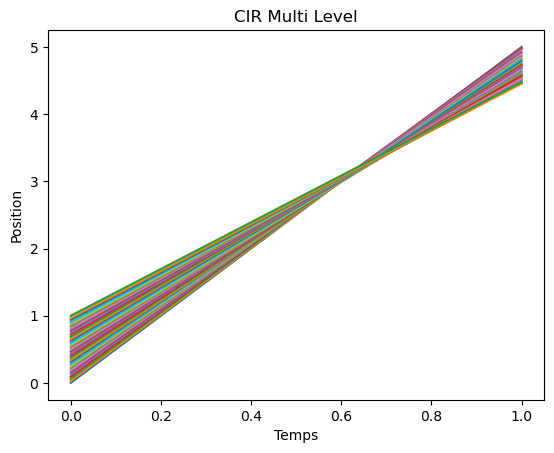

In [ ]:
plt.plot(S)
plt.xlabel('Temps')
plt.ylabel('Position')
plt.title('CIR Multi Level')
plt.show()

In [ ]:
nb_samples = 100 

In [ ]:
M = CIR.multiCIR_ML_principle(alpha, b, sigma, L, T, S_0)

IndexError: tuple index out of range

In [21]:
multiCIR=[]
M = CIR.CIR_new(alpha, b, sigma, 1/100, T, S_0)
multiCIR.append(M)


In [30]:
for j in range(3): 
    A = ([multiCIR[j][0][i] for i in range(0,len(multiCIR[j][0])+1,2)],[multiCIR[j][1][i] for i in range(0,len(multiCIR[j][0])+1,2)])
    multiCIR.append(A)

In [31]:
multiCIR

[(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
         0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
         0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
         0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
         0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
         0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
         0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
         0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
         0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
         0.99, 1.  ]),
  array([5.        , 4.99536775, 4.99231617, 4.93821779, 4.92060888,
         4.99065811, 4.98733267, 4.92598168, 4.97855978, 4.81827023,
         4.7961825 , 4.87447551, 4.87337389, 4.80883166, 4.78883919,
         4.7813592 , 4.83042374, 4.83145046, 4.80112199, 4.88503659,
         4.8374862 , 4.821

In [20]:
for i in range(10):
    plt.plot(multiCIR[i][0],multiCIR[i][1])
plt.xlabel('Temps')
plt.ylabel('Position')
plt.title('multiCIR')
plt.show()

NameError: name 'multiCIR' is not defined

In [ ]:
zap = CIR.CIR(alpha, b, sigma, T, k, S_0)
zap2 = CIR.CIR_ML(alpha, b, sigma, T, k, S_0,5)

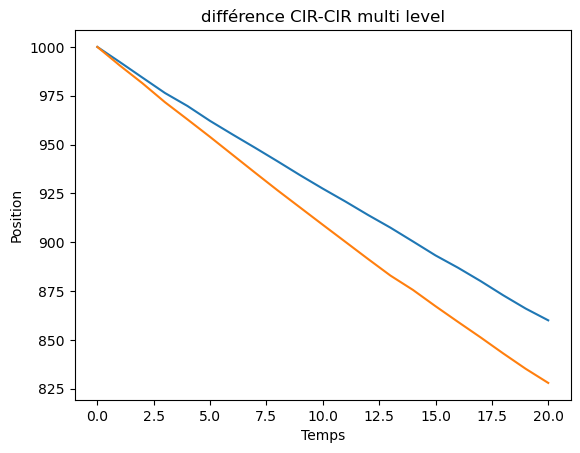

In [ ]:
plt.plot(zap)
plt.plot(zap2)
plt.xlabel('Temps')
plt.ylabel('Position')
plt.title('différence CIR-CIR multi level')
plt.show()

# Multi Level Monte Carlo

In [3]:
import MLMC

In [4]:
import CIR

In [26]:
L = 10

In [27]:
MLMC.level_mc_sim(nb_samples, S_0, T, r, sigma, K, alpha, b, L)

[(array([0.00000000e+00, 9.76562500e-04, 1.95312500e-03, ...,
       9.98046875e-01, 9.99023438e-01, 1.00000000e+00]), array([5.        , 5.02776696, 5.02217584, ..., 4.32212726, 4.32738419,
       4.30965075]))]
[(array([0.00000000e+00, 9.76562500e-04, 1.95312500e-03, ...,
       9.98046875e-01, 9.99023438e-01, 1.00000000e+00]), array([5.        , 5.02776696, 5.02217584, ..., 4.32212726, 4.32738419,
       4.30965075])), (array([0.00000000e+00, 9.76562500e-04, 1.95312500e-03, ...,
       9.98046875e-01, 9.99023438e-01, 1.00000000e+00]), array([5.        , 4.98653906, 4.99621977, ..., 4.25780399, 4.25611316,
       4.23886623]))]
[(array([0.00000000e+00, 9.76562500e-04, 1.95312500e-03, ...,
       9.98046875e-01, 9.99023438e-01, 1.00000000e+00]), array([5.        , 5.02776696, 5.02217584, ..., 4.32212726, 4.32738419,
       4.30965075])), (array([0.00000000e+00, 9.76562500e-04, 1.95312500e-03, ...,
       9.98046875e-01, 9.99023438e-01, 1.00000000e+00]), array([5.        , 4.98653906, 

0.0

In [ ]:
MLMC.mc_telescopic_sum(alpha, b, sigma, L, T, S_0, nb_samples, r, K)

coucou


0.6469375713746368

In [ ]:
MLMC_test = MLMC.sim_MLMC(k, S_0, T, r, sigma, K, alpha, b)

Le ordinary tu fais n fois avec la même dicrétisation alors que le multi level tu fais n fois mais avec des discrétisations de plus en plus fines. Et en plus c'est "gratuit" car on utilise le même mouvement brownien.

In [4]:
test=CIR.ML_principle(alpha, b, sigma, 3, T, S_0)

In [9]:
test.append(([test[2][0][0],test[2][0][len(test[2][0])-1]],[test[2][1][0],test[2][1][len(test[2][1])-1]]))
      

In [10]:
test

[(array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ]),
  array([5.        , 4.72177018, 4.66581253, 4.33860385, 4.47794592,
         4.49415963, 4.07817182, 4.1704046 , 4.1707633 ])),
 ([0.0, 0.25, 0.5, 0.75, 1.0],
  [5.0,
   4.665812528845657,
   4.477945919857697,
   4.0781718160985765,
   4.170763297227557]),
 ([0.0, 0.5, 1.0], [5.0, 4.477945919857697, 4.170763297227557]),
 ([0.0, 1.0], [5.0, 4.170763297227557])]

In [8]:
test=CIR.multiCIR_ML(alpha, b, sigma, 3, T, S_0, 3)

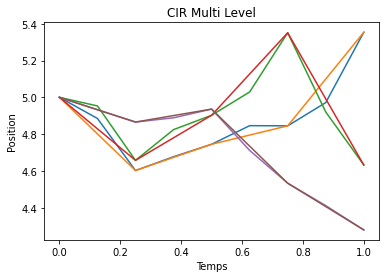

In [9]:
for i in range(3): #nb_sample
    plt.plot(test[i][0][0],test[i][0][1])
    plt.plot(test[i][1][0],test[i][1][1])


plt.xlabel('Temps')
plt.ylabel('Position')
plt.title('CIR Multi Level')
plt.show()

In [3]:
import MLMC

In [5]:
res=MLMC.sim_MLMC_Lfixe( S_0, T, r, sigma, K, alpha, b, 10000,4)

In [6]:
res

[0.013917139366804054,
 -0.0007019902448450743,
 0.003840480830593185,
 0.004112263289775209,
 0.003318091842253068,
 0.029387108273563944,
 -0.022200670535847178,
 -0.016729855988078968,
 -0.00042385720416193706,
 -0.008081879376189538,
 -0.008401596952624074,
 -0.002244345497177669,
 0.014204927220666907,
 0.021299031244000566,
 0.008780013811237941,
 0.005669761060591361,
 0.010526993127787154,
 -0.001285000515840462,
 -0.020758020500388108,
 0.012321961015877958,
 -0.008602936823945084,
 -0.0018333238966191656,
 -0.01651776417544948,
 0.001651329484261277,
 0.002896080974511217,
 -0.017678440410618168,
 0.010884639499543103,
 0.025308229113042313,
 -0.005744600490108831,
 0.02124447072699709,
 -0.019128270303296835,
 0.0011402063325688383,
 -0.002472465639889121,
 -0.005674954600015103,
 -0.0067177529699608,
 0.008247431429155738,
 -0.009709272420786175,
 -0.027776276794712507,
 0.00966187114789796,
 0.011324048682311072,
 0.025804572342116194,
 -0.007446648981175419,
 -0.000198377

In [6]:
MLMC.sim_MLMC(k, S_0, T, r, sigma, K, alpha, b)

105348
100
yo
L trop petit
90611
105348
10633
100
yo
L trop petit
90611
105348
10476
10633
3852
100
yo
coucou
3
90611
105348
10476
10633
3982
3852
yo
1061
100
yo
coucou
4
90611
105348
10476
10633
3977
3982
1331
1061
yo
356
100
yo
conv


(4,
 [105348, 10633, 3982, 1331, 356],
 array([0.        , 0.        , 0.        , 0.        , 0.00017782]),
 array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -3.83665465e-06]))

In [4]:
import CIR
test=CIR.multiCIR_ML(alpha, b, sigma, 0, T, S_0, 10)

In [9]:
test

[(array([0., 1.]), array([5.       , 4.1706379])),
 (array([0., 1.]), array([5.        , 3.82792129])),
 (array([0., 1.]), array([5.        , 3.64556477])),
 (array([0., 1.]), array([5.        , 4.51879863])),
 (array([0., 1.]), array([5.       , 4.6300383])),
 (array([0., 1.]), array([5.       , 4.1771123])),
 (array([0., 1.]), array([5.        , 4.14034853])),
 (array([0., 1.]), array([5.        , 4.01540538])),
 (array([0., 1.]), array([5.        , 4.61502374])),
 (array([0., 1.]), array([5.        , 3.83476028]))]